In [1]:
import pandas as pd
import numpy as np
import os
import pathlib

In [20]:
import matplotlib.patches as mpatches
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
nb_path = pathlib.Path().resolve()
data_path = nb_path.parent / 'data' / 'processed' / 'lamont'

WindowsPath('C:/Users/roseh/Desktop/NYBG_R/notebooks')

In [41]:
plots_path = data_path / 'plots'

In [9]:
df = pd.read_csv(os.path.join(data_path,'LDEO_Carbon_fluxes.csv'), parse_dates=['Date'])

In [15]:
df.columns

Index(['Unnamed: 0', 'Date', 'DT_R', 'DT_NEE', 'Label', 'Res', 'NEE', 'NEE1',
       'NEE2', 'GEE', 'PAR', 'Soil temperature', 'Chamber_temp', 'Soil_moist',
       'Type', 'Number'],
      dtype='object')

In [51]:
df['Label'].unique()

array(['LC_HL1', 'LC_HL2', 'LC_HL3', 'LC_HL4', 'LC_HL5', 'LC_HL6',
       'LH_UL1', 'LH_UL2', 'LH_UL3', 'LH_UL4', 'LH_UL5', 'LH_UL6',
       'LH_SV1', 'LH_SV2'], dtype=object)

In [13]:
df['Type'] = df['Label'].str[-3:-1]
df['Number'] = df['Label'].str[-1]

In [18]:
# group df by type and collar
grouped_type = df.groupby('Type')
grouped_collar = df.groupby('Label')

In [78]:
df_dropped_lh_ul1 = df.drop(grouped_collar.get_group('LH_UL1').index)

In [79]:
grouped_collar_2 = df_dropped_lh_ul1.groupby('Label')

In [14]:
def linear_fit(x,y):
    """Get slope, intercept and r2 for given x, y variables"""
    
    boo_x = ~np.isnan(x)
    boo_y = ~np.isnan(y)
    boo=np.logical_and(boo_x,boo_y)
    slope, intercept, r, p, std_err = stats.linregress(x[boo],y[boo])
    return slope,intercept, r

def myfunc(x, slope, intercept):
    """Equation of the regression line based on linear_fit"""
    
    return slope * x + intercept

In [42]:
def make_scatter_plots(grouped):
    """Plot respiration vs. soil temperature for each collar type"""
    
    colors = ['#e41a1c','#377eb8','#4daf4a']
    types = ['HL', 'UL', 'SV']
    color_dict = dict(zip(types,colors))
    
    for name, group in grouped:
        fig, ax = plt.subplots()
        group.plot('Soil temperature', 'Res', kind='scatter', color=color_dict[name], ax=ax)
        
        slope, intercept, r = linear_fit(group['Soil temperature'], group['Res'])
        x_range = np.linspace(group['Soil temperature'].min(), group['Soil temperature'].max())
        model = myfunc(x_range,slope,intercept)
        ax.plot(x_range,model)
        ax.set_title(f'{name}: {np.around(r,3)}')
        ax.set_ylabel('[\u03BCmol CO$_{2}$ m$^{-2}$ s$^{-1}]$')
        ax.set_ylim(0,40)
        plt.tight_layout()
        plt.show()
        fig.savefig(os.path.join(plots_path, f'ldeo_soil_temp_plot_{name}.png'))
        plt.close()

In [47]:
def make_scatter_plots_chamber_temps(grouped):
    """Plot respiration vs. chamber temperature for each collar type"""
    
    colors = ['#e41a1c','#377eb8','#4daf4a']
    types = ['HL', 'UL', 'SV']
    color_dict = dict(zip(types,colors))
    
    for name, group in grouped:
        fig, ax = plt.subplots()
        group.plot('Chamber_temp', 'Res', kind='scatter', color=color_dict[name], ax=ax)
        
        slope, intercept, r = linear_fit(group['Chamber_temp'], group['Res'])
        x_range = np.linspace(group['Chamber_temp'].min(),group['Chamber_temp'].max())
        model = myfunc(x_range,slope,intercept)
        ax.plot(x_range,model)
        ax.set_title(f'{name}: {np.around(r,3)}')
        ax.set_ylabel('[\u03BCmol CO$_{2}$ m$^{-2}$ s$^{-1}]$')
        ax.set_xlabel('Chamber Temperature')
        ax.set_ylim(0,40)
        plt.tight_layout()
        plt.show()
        fig.savefig(os.path.join(plots_path, f'ldeo_chamber_temp_plot_{name}.png'))
        plt.close()

In [84]:
def make_scatter_plots_collars(grouped):
    """Plot respiration vs. soil temperature for each collar type"""
    
    colors = ['#e41a1c','#377eb8','#4daf4a']
    types = ['HL', 'UL', 'SV']
    color_dict = dict(zip(types,colors))
    
    for name, group in grouped:
        print(name)
        fig, ax = plt.subplots()
        lawn_type = group.reset_index()['Type'][0]
        group.plot('Soil temperature', 'Res', kind='scatter', color=color_dict[lawn_type], ax=ax)
        try:
            slope, intercept, r = linear_fit(group['Soil temperature'], group['Res'])
            x_range = np.linspace(group['Soil temperature'].min(), group['Soil temperature'].max())
            model = myfunc(x_range,slope,intercept)
            ax.plot(x_range,model)
            ax.set_title(f'{name}: {np.around(r,3)}')
            ax.set_ylabel('[\u03BCmol CO$_{2}$ m$^{-2}$ s$^{-1}]$')
            ax.set_ylim(0,40)
            plt.tight_layout()
            plt.show()
            fig.savefig(os.path.join(plots_path, f'ldeo_collar_plot_{name}.png'))
            plt.close()
        except ValueError:
            ax.set_title(f'{name}: no linear regression')
            ax.set_ylabel('[\u03BCmol CO$_{2}$ m$^{-2}$ s$^{-1}]$')
            ax.set_ylim(0,40)
            plt.tight_layout()
            plt.show()
            fig.savefig(os.path.join(plots_path, f'ldeo_collar_plot_{name}.png'))
            plt.close()

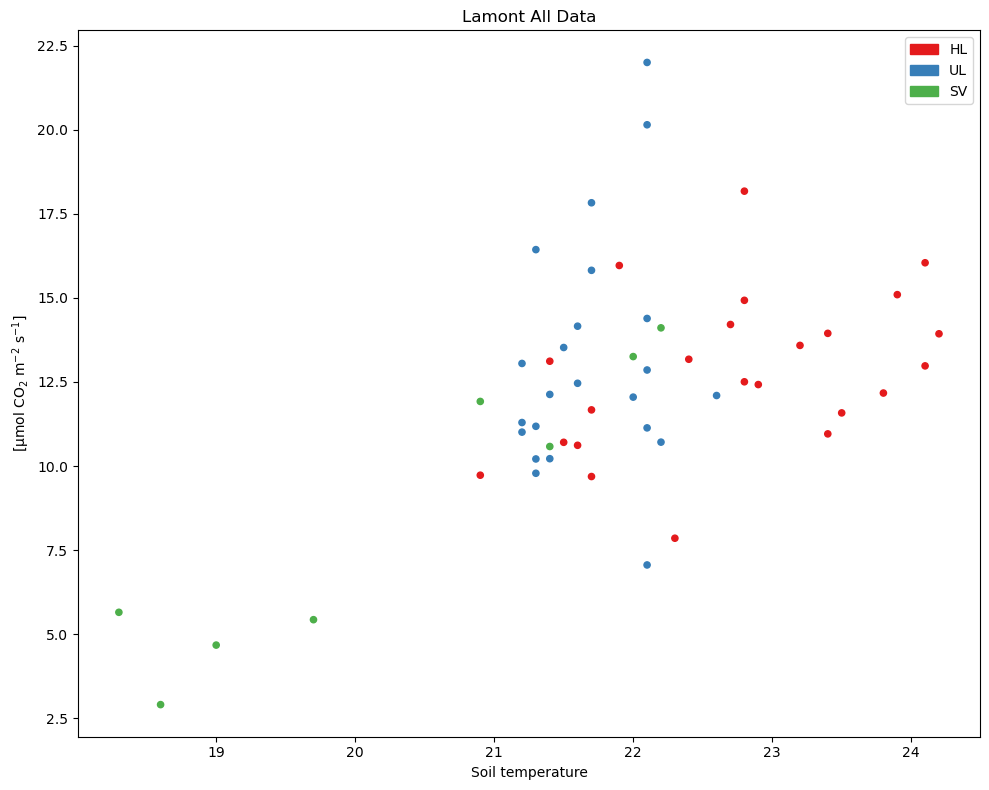

In [44]:
# plot all data on one axis

colors = ['#e41a1c','#377eb8','#4daf4a']
types = ['HL', 'UL', 'SV']
color_dict = dict(zip(types,colors))

fig, ax = plt.subplots(figsize=(10,8))

df.plot('Soil temperature', 'Res', ax=ax, kind='scatter', color=df['Type'].replace(color_dict))

# get legend info
patch_list = []
i = 0
for t in types:
    patch_list.append(mpatches.Patch(label=t, color=colors[i]))
    i += 1

plt.ylabel('[\u03BCmol CO$_{2}$ m$^{-2}$ s$^{-1}]$')
plt.legend(handles=patch_list)
plt.title('Lamont All Data')
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(plots_path, 'ldeo_all_data.png'))
plt.close()

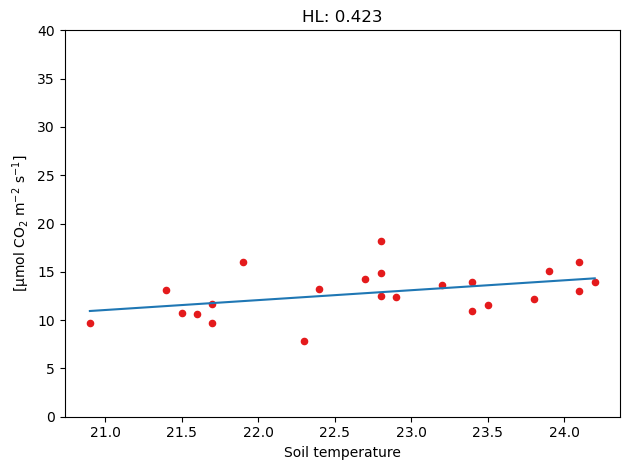

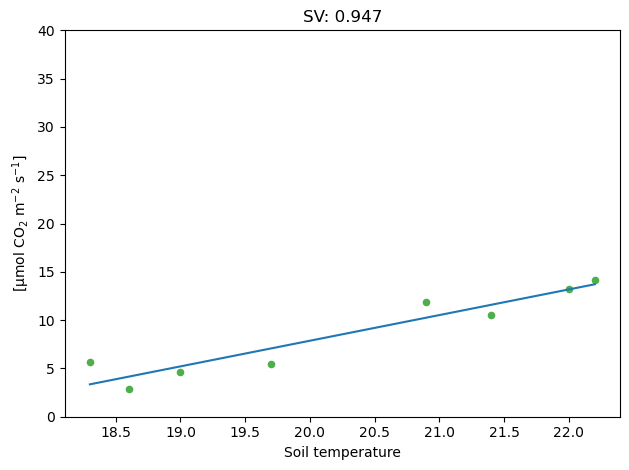

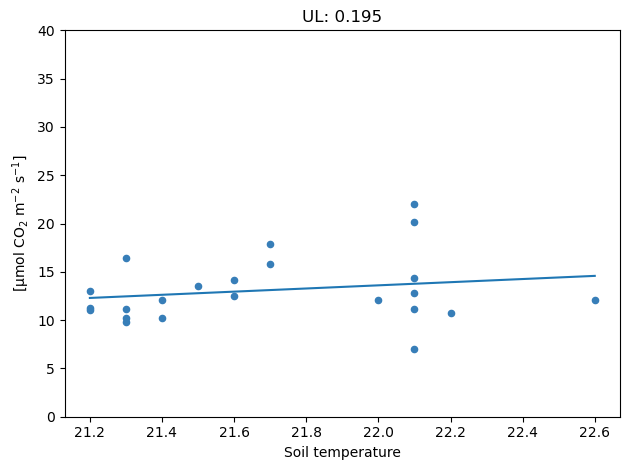

In [45]:
make_scatter_plots(grouped_type)

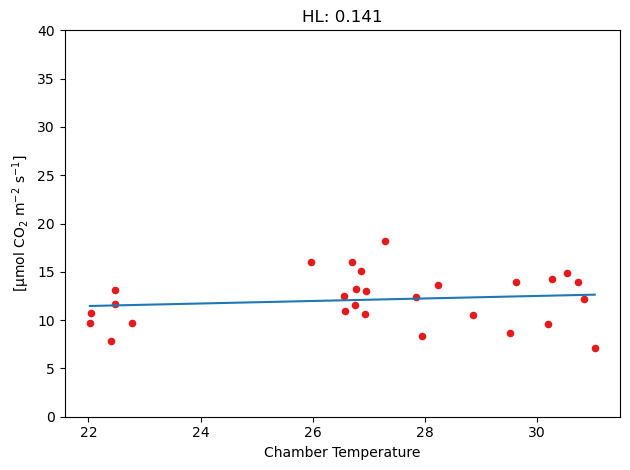

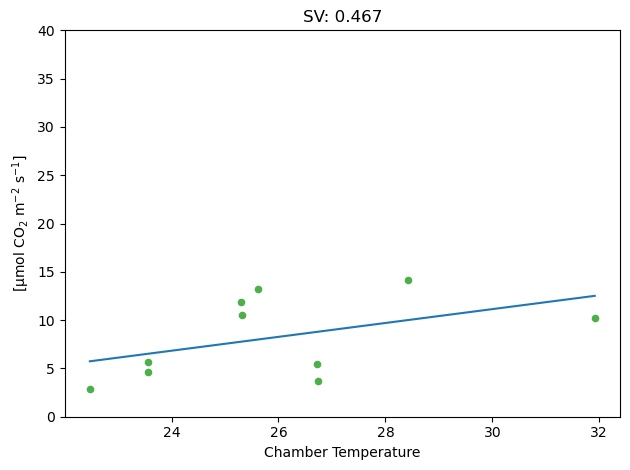

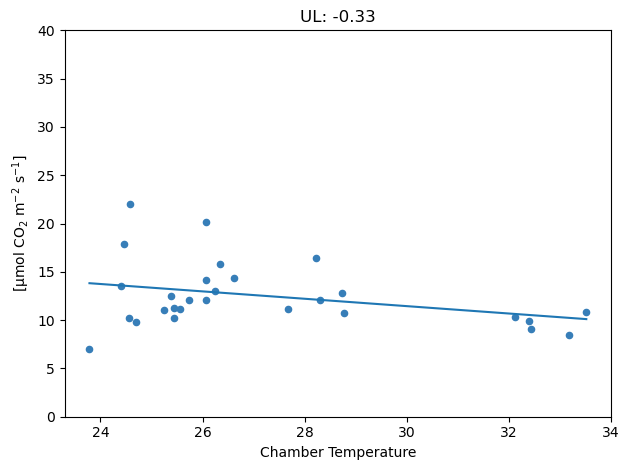

In [48]:
make_scatter_plots_chamber_temps(grouped_type)

LC_HL1


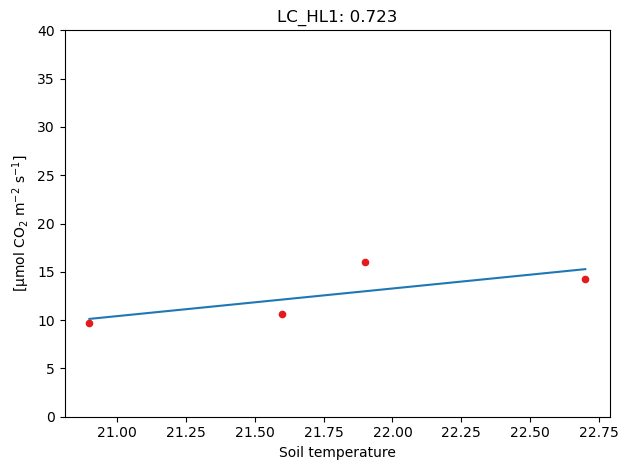

LC_HL2


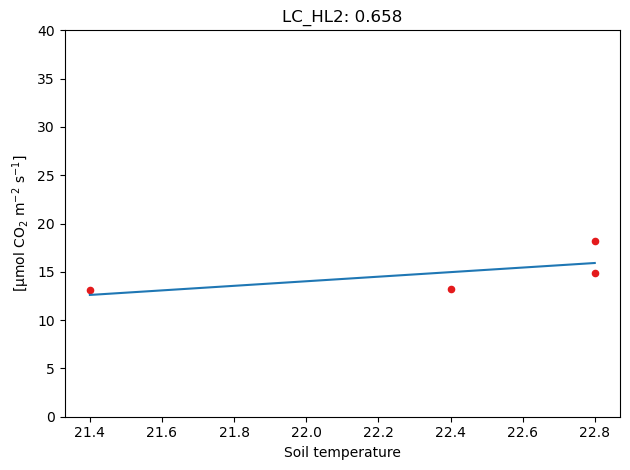

LC_HL3


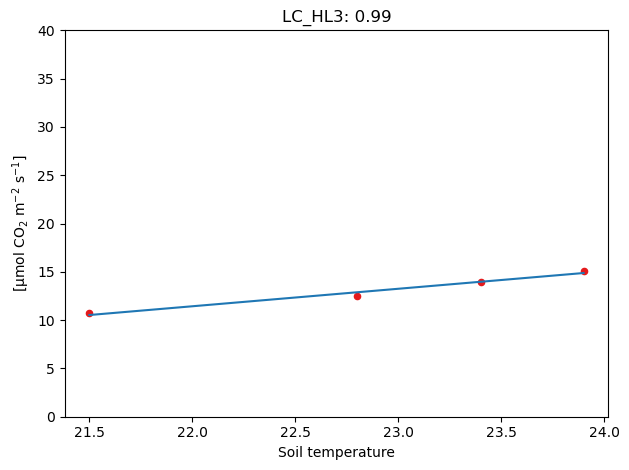

LC_HL4


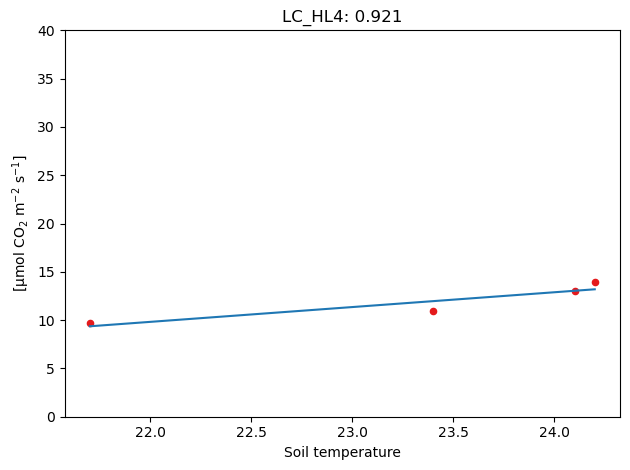

LC_HL5


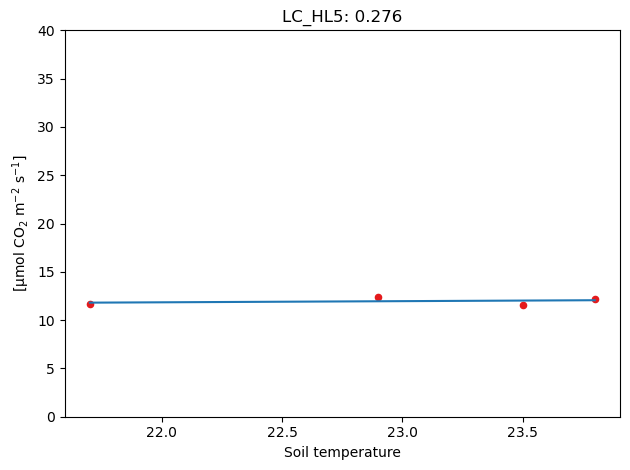

LC_HL6


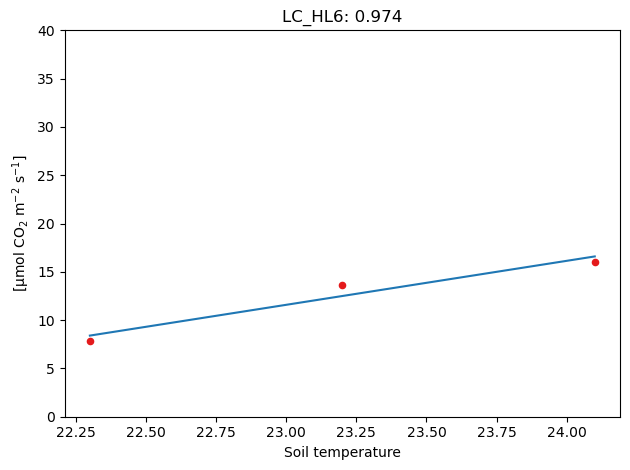

LH_SV1


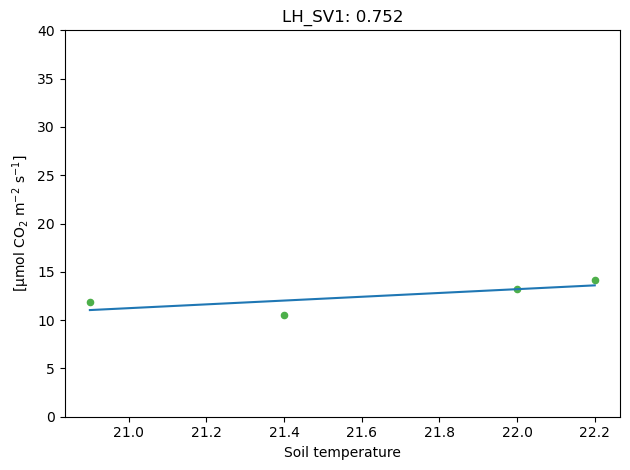

LH_SV2


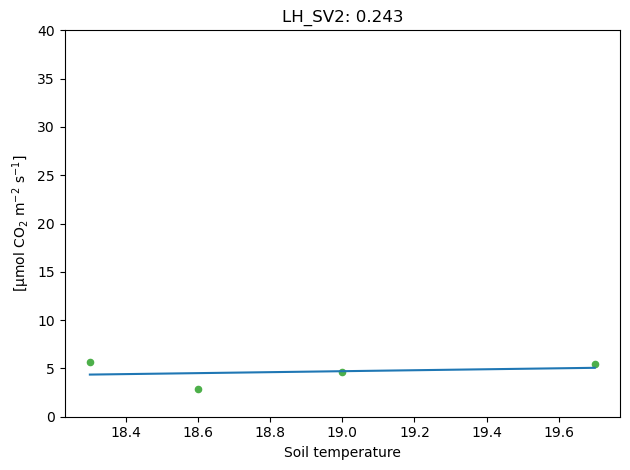

LH_UL1


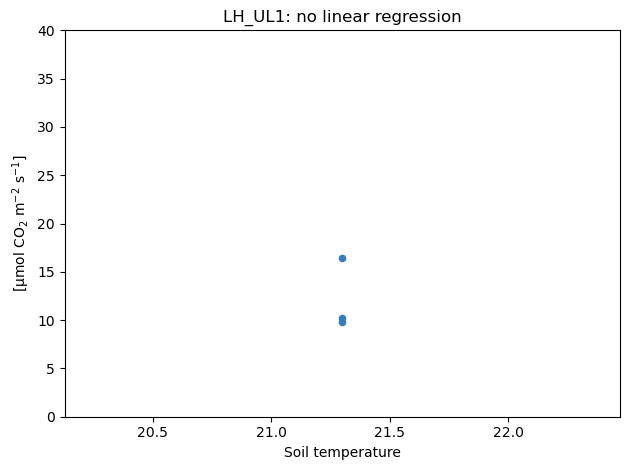

LH_UL2


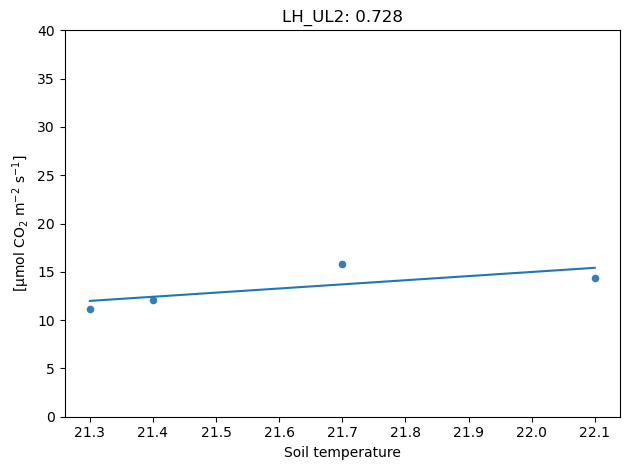

LH_UL3


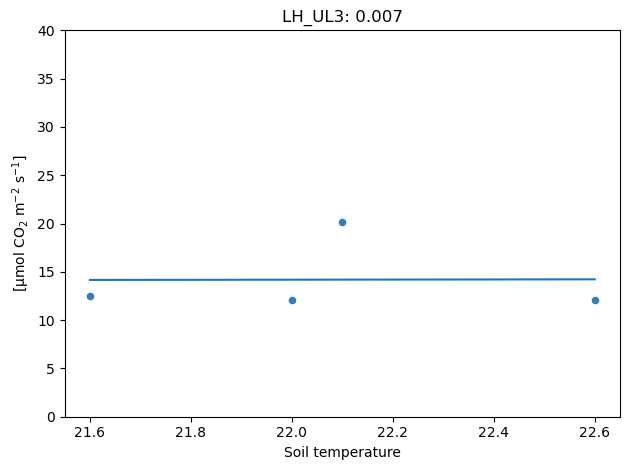

LH_UL4


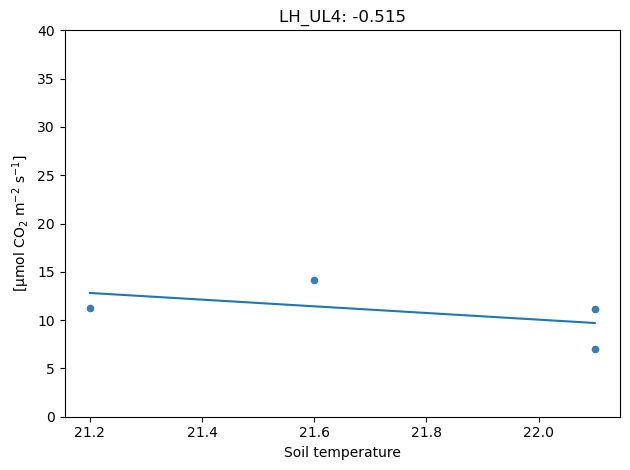

LH_UL5


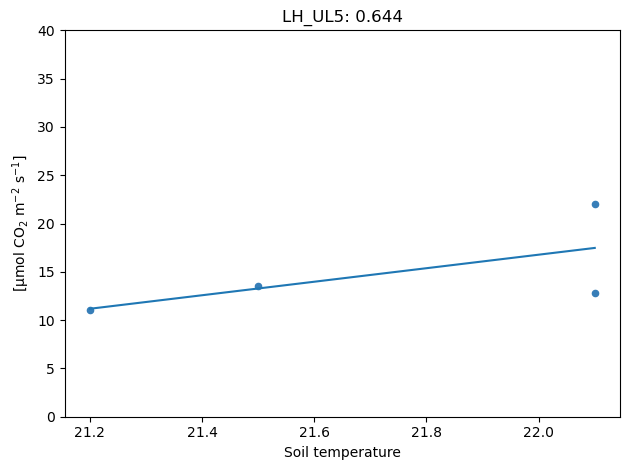

LH_UL6


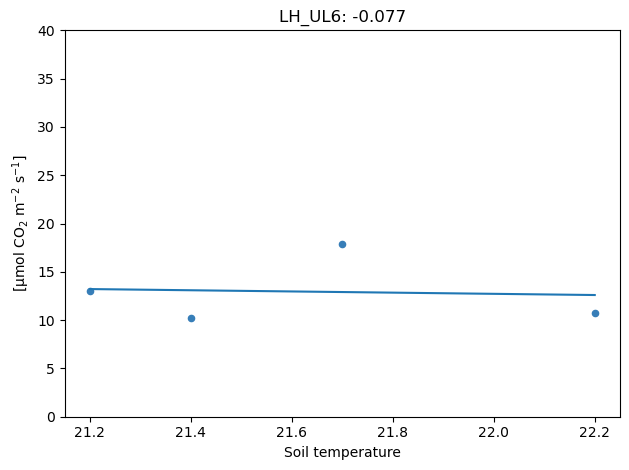

In [85]:
make_scatter_plots_collars(grouped_collar)